In [1]:
# 대표값 card_category 활용 결측치 Unkown 대체


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


data = pd.read_csv("./BankChurners_del.csv")


In [2]:

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# # 범주형 변수들  INT형태로 변환

# # 타겟 값을 Existing을 1로 Attributed를 0으로

# # 머신러닝 결과가 많이 좋아짐

# from sklearn import preprocessing

# def encode_features(dataDf):
#     data['Attrition_Flag'] = data['Attrition_Flag'].str[:1]
#     data['Gender'] = data['Gender'].str[:1]
# #     data['Education_Level'] = data['Education_Level'].str[:3]
# #     data['Marital_Status'] = data['Marital_Status'].str[:1]
#     data['Card_Category'] = data['Card_Category'].str[:1]
# #     data['Income_Category'] = data['Income_Category'].str[:2]
#     features = ['Attrition_Flag','Gender','Card_Category'] #,'Education_Level','Marital_Status','Card_Category','Income_Category']
#     for feature in features:
#         le = preprocessing.LabelEncoder()
#         le = le.fit(dataDf[feature])
#         dataDf[feature] = le.transform(dataDf[feature])
        
#     return dataDf


# data = encode_features(data)


In [4]:
data["Attrition_Flag"].replace({"Existing Customer":0,
                            "Attrited Customer":1,
                            },inplace=True)

In [5]:
data["Gender"].replace({"F":1, "M":0},inplace=True)

In [6]:
data["Card_Category"].replace({"Blue":0,
                                 "Silver":1,
                                 "Gold":2,
                                 "Platinum":3,
                                 },inplace=True)

In [7]:
# # X,y 분할

# X = df.drop(['CLIENTNUM','Attrition_Flag'], axis = 1)
# Y = df['Attrition_Flag']

In [8]:
data["Education_Level"].replace({"Unknown":np.nan,
                                "Graduate":0,
                                "Post-Graduate":1,
                                "Uneducated":2,
                                "College":3,
                                "Doctorate":4,
                                "High School":5,
                                 },inplace=True)


In [9]:
data["Income_Category"].replace({"Unknown":np.nan,
                                "Less than $40K":0,
                                "$40K - $60K":1,
                                "$60K - $80K":2,
                                "$80K - $120K":3,
                                "$120K +":4,
                                 },inplace=True)


In [10]:
data["Marital_Status"].replace({"Unknown":np.nan,
                                "Married":0,
                                "Single":1,
                                "Divorced":2,
                                 },inplace=True)


In [11]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,5.0,0.0,2.0,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,0.0,1.0,0.0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,0.0,0.0,3.0,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,5.0,NaN,0.0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,2.0,0.0,2.0,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,0,2,0.0,1.0,1.0,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,0,2,NaN,2.0,1.0,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,1,1,5.0,0.0,0.0,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,0,2,0.0,NaN,1.0,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [12]:
# 범주형 데이터

data_cate = data[['CLIENTNUM','Attrition_Flag','Gender','Marital_Status','Education_Level','Income_Category','Card_Category']]
data_cate

,CLIENTNUM,Attrition_Flag,Gender,Marital_Status,Education_Level,Income_Category,Card_Category
0,768805383,0,0,0.0,5.0,2.0,0
1,818770008,0,1,1.0,0.0,0.0,0
2,713982108,0,0,0.0,0.0,3.0,0
3,769911858,0,1,NaN,5.0,0.0,0
4,709106358,0,0,0.0,2.0,2.0,0
...,...,...,...,...,...,...,...
10122,772366833,0,0,1.0,0.0,1.0,0
10123,710638233,1,0,2.0,NaN,1.0,0
10124,716506083,1,1,0.0,5.0,0.0,0
10125,717406983,1,0,NaN,0.0,1.0,0


In [13]:
# 대표값 이용 결측치 대체

from sklearn.impute import SimpleImputer


# 각 데이터에 사용할 인스턴스 생성ㅠ

SI_mode =SimpleImputer(strategy = 'most_frequent') # 대표값 최빈값

SI_mean = SimpleImputer(strategy = 'mean') # 대표값 평균

In [14]:
# 학습

SI_mode.fit(data_cate)
data_finish_cate = pd.DataFrame(SI_mode.transform(data_cate),
                            columns = data_cate.columns)
data_finish_cate

SimpleImputer(strategy='most_frequent')

,CLIENTNUM,Attrition_Flag,Gender,Marital_Status,Education_Level,Income_Category,Card_Category
0,768805383.0,0.0,0.0,0.0,5.0,2.0,0.0
1,818770008.0,0.0,1.0,1.0,0.0,0.0,0.0
2,713982108.0,0.0,0.0,0.0,0.0,3.0,0.0
3,769911858.0,0.0,1.0,0.0,5.0,0.0,0.0
4,709106358.0,0.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
10122,772366833.0,0.0,0.0,1.0,0.0,1.0,0.0
10123,710638233.0,1.0,0.0,2.0,0.0,1.0,0.0
10124,716506083.0,1.0,1.0,0.0,5.0,0.0,0.0
10125,717406983.0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
data_cont = data.drop(['CLIENTNUM','Attrition_Flag','Gender','Marital_Status','Education_Level','Income_Category','Card_Category'],axis=1)
data_cont.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [16]:
# 수치형 변수 중에 drop시킨 변수를 제외한 나머지 변수들을 모은 리스트를 만든다.
Numerics = ['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Total_Amt_Chng_Q4_Q1', 
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'] 

In [17]:
data_cont[Numerics]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,45,3,39,5,1,3,12691.0,777,1.335,42,1.625
1,49,5,44,6,1,2,8256.0,864,1.541,33,3.714
2,51,3,36,4,1,0,3418.0,0,2.594,20,2.333
3,40,4,34,3,4,1,3313.0,2517,1.405,20,2.333
4,40,3,21,5,1,0,4716.0,0,2.175,28,2.500
...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,0.703,117,0.857
10123,41,2,25,4,2,3,4277.0,2186,0.804,69,0.683
10124,44,1,36,5,3,4,5409.0,0,0.819,60,0.818
10125,30,2,36,4,3,3,5281.0,0,0.535,62,0.722


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for numeric in Numerics:
    data_cont[numeric] = scaler.fit_transform(data_cont[numeric].values.reshape(-1,1))
    
data_cont

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,11914.0,2.623494,1144,-0.973895,3.834003,0.061
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,7392.0,3.563293,1291,-1.357340,12.608573,0.105
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,3418.0,8.367214,1887,-1.911206,6.807864,0.000
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,796.0,2.942843,1171,-1.911206,6.807864,0.760
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,4716.0,6.455682,816,-1.570365,7.509325,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,2152.0,-0.259771,15476,2.221481,0.608119,0.462
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,2091.0,0.201004,8764,0.176440,-0.122745,0.511
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,5409.0,0.269436,10291,-0.207005,0.444305,0.000
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,5281.0,-1.026208,8395,-0.121795,0.041070,0.000


In [19]:
df = pd.concat([data_finish_cate,data_cont],axis=1)

In [20]:
df

,CLIENTNUM,Attrition_Flag,Gender,Marital_Status,Education_Level,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383.0,0.0,0.0,0.0,5.0,2.0,0.0,-0.165406,0.503368,0.384621,...,-1.327136,0.492404,0.446622,-0.473422,11914.0,2.623494,1144,-0.973895,3.834003,0.061
1,818770008.0,0.0,1.0,1.0,0.0,0.0,0.0,0.333570,2.043199,1.010715,...,-1.327136,-0.411616,-0.041367,-0.366667,7392.0,3.563293,1291,-1.357340,12.608573,0.105
2,713982108.0,0.0,0.0,0.0,0.0,3.0,0.0,0.583058,0.503368,0.008965,...,-1.327136,-2.219655,-0.573698,-1.426858,3418.0,8.367214,1887,-1.911206,6.807864,0.000
3,769911858.0,0.0,1.0,0.0,5.0,0.0,0.0,-0.789126,1.273283,-0.241473,...,1.641478,-1.315636,-0.585251,1.661686,796.0,2.942843,1171,-1.911206,6.807864,0.760
4,709106358.0,0.0,0.0,0.0,2.0,2.0,0.0,-0.789126,0.503368,-1.869317,...,-1.327136,-2.219655,-0.430877,-1.426858,4716.0,6.455682,816,-1.570365,7.509325,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833.0,0.0,0.0,1.0,0.0,1.0,0.0,0.458314,-0.266547,0.509840,...,-0.337598,0.492404,-0.509330,0.844455,2152.0,-0.259771,15476,2.221481,0.608119,0.462
10123,710638233.0,1.0,0.0,2.0,0.0,1.0,0.0,-0.664382,-0.266547,-1.368442,...,-0.337598,0.492404,-0.479181,1.255524,2091.0,0.201004,8764,0.176440,-0.122745,0.511
10124,716506083.0,1.0,1.0,0.0,5.0,0.0,0.0,-0.290150,-1.036462,0.008965,...,0.651940,1.396424,-0.354626,-1.426858,5409.0,0.269436,10291,-0.207005,0.444305,0.000
10125,717406983.0,1.0,0.0,0.0,0.0,1.0,0.0,-2.036565,-0.266547,0.008965,...,0.651940,0.492404,-0.368710,-1.426858,5281.0,-1.026208,8395,-0.121795,0.041070,0.000


In [21]:
# X,y 분할

X = df.drop(['CLIENTNUM','Attrition_Flag','Avg_Open_To_Buy','Total_Trans_Amt','Avg_Utilization_Ratio','Total_Amt_Chng_Q4_Q1'], axis = 1)
Y = df['Attrition_Flag']


In [22]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y,random_state=4,stratify=Y)

In [23]:
# 결측치 확인

Train_X.isnull().sum()

Gender                      0
Marital_Status              0
Education_Level             0
Income_Category             0
Card_Category               0
Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

In [24]:
import xgboost as xgb
from xgboost import plot_importance

# 학습용/테스트용 모두 변환 해야 함

dtrain = xgb.DMatrix(data=Train_X,label = Train_Y)

dtest = xgb.DMatrix(data= Test_X,label=Test_Y)

params = { 'max_depth':6,
           'eta': 0.1,  # learning_rate
           'objective':'binary:logistic', 
           'eval_metric':'logloss',
#          'silent' : 0,  # 출력메시지 간략화
#           'verbosity':0
        }
num_rounds = 400  # 부스팅 반복 횟수



# train 데이터 셋은 ‘train’ , evaluation 데이터 셋은 ‘eval'로 명기
wlist = [(dtrain,'train'),(dtest,'eval') ] # eval 평가용

xgb_model = xgb.train(params =params,
                     dtrain = dtrain,
                     num_boost_round = num_rounds,
                     early_stopping_rounds = 100, #조기종료 설정 # 너무 낮게 설명하면 최소 오차를 찾지 못함
                     evals = wlist)


# 211이후 100번 더 반복 동안 성능 평가 지수가 향상되지 못해서 학습 종료 - 단 311까지 학습을 종료한 모델을 사용
# 211이 best여도 311까지는 학습을 해야 성능을 높일 수 있음

[0]	train-logloss:0.62041	eval-logloss:0.62292
[1]	train-logloss:0.56010	eval-logloss:0.56488
[2]	train-logloss:0.50967	eval-logloss:0.51676
[3]	train-logloss:0.46671	eval-logloss:0.47630
[4]	train-logloss:0.43006	eval-logloss:0.44220
[5]	train-logloss:0.39846	eval-logloss:0.41292
[6]	train-logloss:0.37095	eval-logloss:0.38760
[7]	train-logloss:0.34722	eval-logloss:0.36577
[8]	train-logloss:0.32639	eval-logloss:0.34665
[9]	train-logloss:0.30775	eval-logloss:0.32949
[10]	train-logloss:0.29108	eval-logloss:0.31462
[11]	train-logloss:0.27592	eval-logloss:0.30114
[12]	train-logloss:0.26271	eval-logloss:0.28925
[13]	train-logloss:0.25069	eval-logloss:0.27854
[14]	train-logloss:0.24026	eval-logloss:0.26909
[15]	train-logloss:0.23043	eval-logloss:0.26093
[16]	train-logloss:0.22205	eval-logloss:0.25374
[17]	train-logloss:0.21376	eval-logloss:0.24642
[18]	train-logloss:0.20669	eval-logloss:0.24084
[19]	train-logloss:0.20001	eval-logloss:0.23520
[20]	train-logloss:0.19368	eval-logloss:0.23002
[2

[170]	train-logloss:0.06530	eval-logloss:0.16364
[171]	train-logloss:0.06490	eval-logloss:0.16376
[172]	train-logloss:0.06470	eval-logloss:0.16365
[173]	train-logloss:0.06458	eval-logloss:0.16366
[174]	train-logloss:0.06416	eval-logloss:0.16387
[175]	train-logloss:0.06410	eval-logloss:0.16386
[176]	train-logloss:0.06389	eval-logloss:0.16377
[177]	train-logloss:0.06377	eval-logloss:0.16381
[178]	train-logloss:0.06373	eval-logloss:0.16393
[179]	train-logloss:0.06352	eval-logloss:0.16386
[180]	train-logloss:0.06340	eval-logloss:0.16395
[181]	train-logloss:0.06331	eval-logloss:0.16392
[182]	train-logloss:0.06318	eval-logloss:0.16400
[183]	train-logloss:0.06274	eval-logloss:0.16414
[184]	train-logloss:0.06231	eval-logloss:0.16417
[185]	train-logloss:0.06202	eval-logloss:0.16405
[186]	train-logloss:0.06163	eval-logloss:0.16425
[187]	train-logloss:0.06152	eval-logloss:0.16430
[188]	train-logloss:0.06132	eval-logloss:0.16446
[189]	train-logloss:0.06112	eval-logloss:0.16460
[190]	train-logloss:

In [26]:
pred_probs = xgb_model.predict(dtest)


print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))


predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.99  0.002 0.059 0.94  0.74  0.882 0.107 0.001 0.005 0.001]


In [27]:
# 예측 확률로 예측값이 반환 되므로 임계값을 정해 0또는 1로 변환해야 함

preds = [1 if x > 0.5 else 0 for x in pred_probs]

print(np.round(preds[:10],3))

[1 0 0 1 1 1 0 0 0 0]


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

    
    
 # 테스트 레이블 y_test 예측/레이블 /예측확률
xgb_clf = get_clf_eval(Test_Y,preds,pred_probs)

오차 행렬
[[2065   60]
 [ 107  300]]
정확도: 0.9340, 정밀도: 0.8333, 재현율: 0.7371,    F1: 0.7823, AUC:0.9661


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

Text(0.5, 0, 'F-score')

Text(0, 0.5, 'Features')

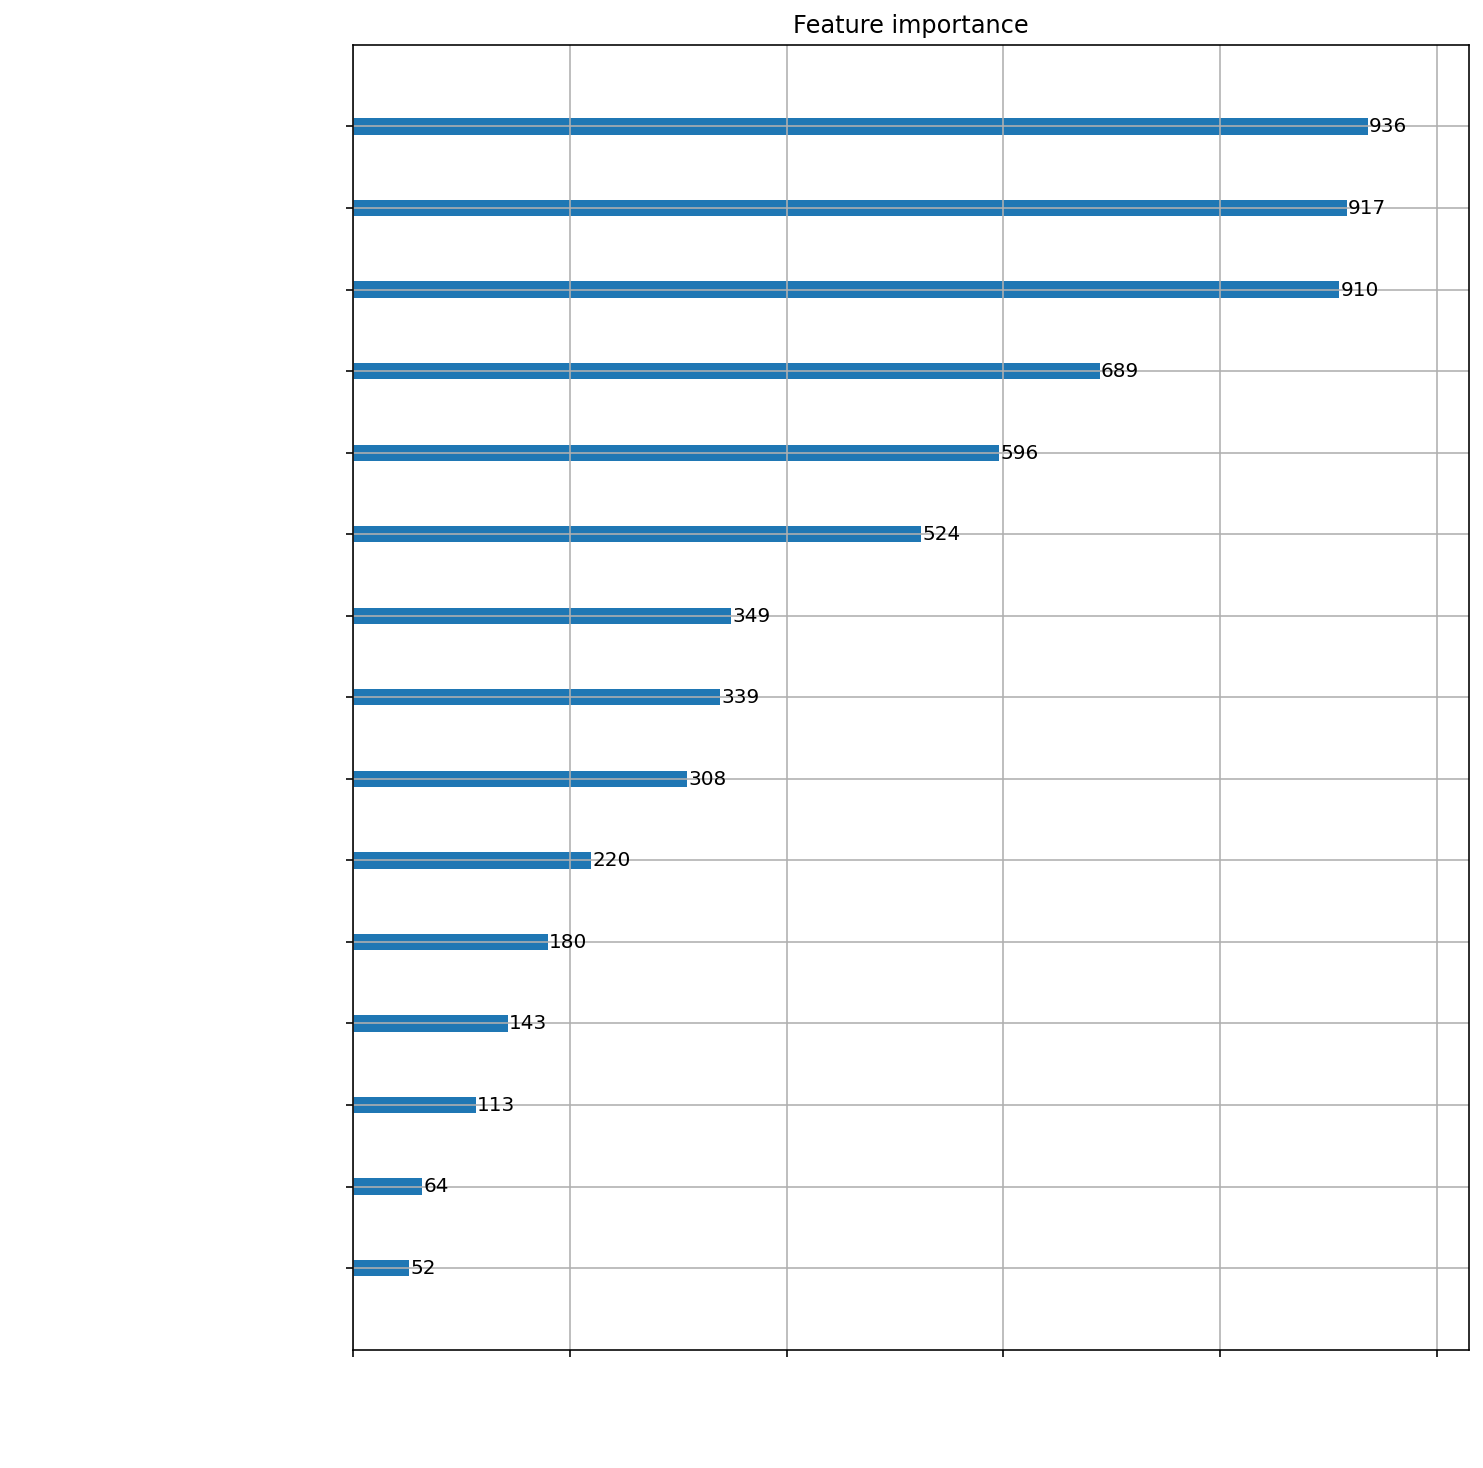

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline


font = {
        'color': 'white',
        'size' : 16
         }




fig, ax = plt.subplots(figsize=(10, 12)) # 축 반환
plot_importance(xgb_model, ax=ax) # 학습이 된 xgb_model과 축
plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')

plt.xlabel('F-score', labelpad=20, fontdict=font)
plt.ylabel('Features', labelpad=20, fontdict=font)

In [30]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier


In [31]:
evals = [(Test_X,Test_Y)]

# 주의사항 : 검증 데이터 세트를 따로 생성해서 검증을 진행해야 함
# 예제 데이터의 양이 검증용 데이터를 추출하기에 너무 적어 test용 데이터를 검증용과 테스트용으로 사용
# 실제 분석에서는 이렇게 진행하게 안됨

In [32]:
# 모델 객체 인스턴스 생성

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)

In [33]:
# 학습과 예측 수행 : fit(), predict(), predict_proba() 이용
# fit() 에서 early_stopping_rounds설정, eval_metric도 설정

xgb_wrapper.fit(Train_X,Train_Y,early_stopping_rounds = 100,
               eval_set = evals, eval_metric='logloss',verbose=True)

[0]	validation_0-logloss:0.62783
[1]	validation_0-logloss:0.57459
[2]	validation_0-logloss:0.53043
[3]	validation_0-logloss:0.49340
[4]	validation_0-logloss:0.46263
[5]	validation_0-logloss:0.43528
[6]	validation_0-logloss:0.41173
[7]	validation_0-logloss:0.39169
[8]	validation_0-logloss:0.37355
[9]	validation_0-logloss:0.35768
[10]	validation_0-logloss:0.34358
[11]	validation_0-logloss:0.33122
[12]	validation_0-logloss:0.32041
[13]	validation_0-logloss:0.31038
[14]	validation_0-logloss:0.30151
[15]	validation_0-logloss:0.29341
[16]	validation_0-logloss:0.28662
[17]	validation_0-logloss:0.27987
[18]	validation_0-logloss:0.27359
[19]	validation_0-logloss:0.26814
[20]	validation_0-logloss:0.26294
[21]	validation_0-logloss:0.25829
[22]	validation_0-logloss:0.25404
[23]	validation_0-logloss:0.24970
[24]	validation_0-logloss:0.24663
[25]	validation_0-logloss:0.24355
[26]	validation_0-logloss:0.24064
[27]	validation_0-logloss:0.23761
[28]	validation_0-logloss:0.23538
[29]	validation_0-loglos

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[57]	validation_0-logloss:0.19858
[58]	validation_0-logloss:0.19784
[59]	validation_0-logloss:0.19726
[60]	validation_0-logloss:0.19680
[61]	validation_0-logloss:0.19625
[62]	validation_0-logloss:0.19575
[63]	validation_0-logloss:0.19519
[64]	validation_0-logloss:0.19474
[65]	validation_0-logloss:0.19465
[66]	validation_0-logloss:0.19404
[67]	validation_0-logloss:0.19368
[68]	validation_0-logloss:0.19299
[69]	validation_0-logloss:0.19228
[70]	validation_0-logloss:0.19168
[71]	validation_0-logloss:0.19140
[72]	validation_0-logloss:0.19122
[73]	validation_0-logloss:0.19088
[74]	validation_0-logloss:0.19040
[75]	validation_0-logloss:0.18896
[76]	validation_0-logloss:0.18855
[77]	validation_0-logloss:0.18849
[78]	validation_0-logloss:0.18807
[79]	validation_0-logloss:0.18770
[80]	validation_0-logloss:0.18714
[81]	validation_0-logloss:0.18665
[82]	validation_0-logloss:0.18636
[83]	validation_0-logloss:0.18581
[84]	validation_0-logloss:0.18553
[85]	validation_0-logloss:0.18462
[86]	validatio

[293]	validation_0-logloss:0.16140
[294]	validation_0-logloss:0.16120
[295]	validation_0-logloss:0.16123
[296]	validation_0-logloss:0.16109
[297]	validation_0-logloss:0.16084
[298]	validation_0-logloss:0.16084
[299]	validation_0-logloss:0.16084
[300]	validation_0-logloss:0.16089
[301]	validation_0-logloss:0.16098
[302]	validation_0-logloss:0.16097
[303]	validation_0-logloss:0.16104
[304]	validation_0-logloss:0.16097
[305]	validation_0-logloss:0.16096
[306]	validation_0-logloss:0.16100
[307]	validation_0-logloss:0.16087
[308]	validation_0-logloss:0.16092
[309]	validation_0-logloss:0.16097
[310]	validation_0-logloss:0.16104
[311]	validation_0-logloss:0.16116
[312]	validation_0-logloss:0.16117
[313]	validation_0-logloss:0.16106
[314]	validation_0-logloss:0.16104
[315]	validation_0-logloss:0.16103
[316]	validation_0-logloss:0.16106
[317]	validation_0-logloss:0.16101
[318]	validation_0-logloss:0.16101
[319]	validation_0-logloss:0.16103
[320]	validation_0-logloss:0.16097
[321]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
w_preds = xgb_wrapper.predict(Test_X)
w_pred_proba = xgb_wrapper.predict_proba(Test_X)[:,1]


In [35]:
def get_clf_eval(y_test, pred) : 
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)     # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)         # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}'.format(accuracy, precision, recall))  

In [36]:
# 예측 성능 평가 수행


get_clf_eval(Test_Y,w_preds)



오차행렬
[[2075   50]
 [ 111  296]]
정확도: 0.936, 정밀도: 0.855, 재현율: 0.727


In [37]:
w_pred_proba = xgb_wrapper.predict_proba(Test_X)

pred_proba = w_pred_proba

pred_proba[:10]

array([[0.04942894, 0.95057106],
       [0.9968237 , 0.00317624],
       [0.86548084, 0.13451916],
       [0.06359816, 0.93640184],
       [0.24494529, 0.7550547 ],
       [0.31433868, 0.6856613 ],
       [0.9186704 , 0.08132961],
       [0.9988807 , 0.00111931],
       [0.97934884, 0.02065115],
       [0.96526265, 0.03473732]], dtype=float32)

In [38]:

from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=1.0)
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=1.0)
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred) : 
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)     # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)         # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}'.format(accuracy, precision, recall))    
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임계값 = 0.5로 설정.  
c_threshold = 0.5

# predict_proba() 반환값이 [0확률, 1확률]로 반환 - positive 클래스 컬럼만 추출해서 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(Test_Y,custom_predict )


오차행렬
[[2075   50]
 [ 111  296]]
정확도: 0.936, 정밀도: 0.855, 재현율: 0.727


In [39]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.05,0.11,0.2,0.3,0.33,0.37, 0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:',custom_threshold)
        get_clf_eval(Test_Y , custom_predict)

In [40]:
get_eval_by_threshold(Test_Y,pred_proba[:,1].reshape(-1,1),thresholds)


임곗값: 0.05
오차행렬
[[1634  491]
 [  15  392]]
정확도: 0.800, 정밀도: 0.444, 재현율: 0.963

임곗값: 0.11
오차행렬
[[1831  294]
 [  26  381]]
정확도: 0.874, 정밀도: 0.564, 재현율: 0.936

임곗값: 0.2
오차행렬
[[1961  164]
 [  48  359]]
정확도: 0.916, 정밀도: 0.686, 재현율: 0.882

임곗값: 0.3
오차행렬
[[2017  108]
 [  70  337]]
정확도: 0.930, 정밀도: 0.757, 재현율: 0.828

임곗값: 0.33
오차행렬
[[2027   98]
 [  74  333]]
정확도: 0.932, 정밀도: 0.773, 재현율: 0.818

임곗값: 0.37
오차행렬
[[2037   88]
 [  86  321]]
정확도: 0.931, 정밀도: 0.785, 재현율: 0.789

임곗값: 0.4
오차행렬
[[2050   75]
 [  93  314]]
정확도: 0.934, 정밀도: 0.807, 재현율: 0.771

임곗값: 0.45
오차행렬
[[2063   62]
 [ 103  304]]
정확도: 0.935, 정밀도: 0.831, 재현율: 0.747

임곗값: 0.5
오차행렬
[[2075   50]
 [ 111  296]]
정확도: 0.936, 정밀도: 0.855, 재현율: 0.727

임곗값: 0.55
오차행렬
[[2086   39]
 [ 117  290]]
정확도: 0.938, 정밀도: 0.881, 재현율: 0.713

임곗값: 0.6
오차행렬
[[2091   34]
 [ 127  280]]
정확도: 0.936, 정밀도: 0.892, 재현율: 0.688


In [41]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = xgb_wrapper.predict_proba(Test_X)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(Test_Y, pred_proba_class1)

In [42]:
print('임계값 shape: ', thresholds.shape)
print('정밀도 shape: ', precisions.shape)
print('재현율 shape: ', recalls.shape)

임계값 shape:  (1684,)
정밀도 shape:  (1685,)
재현율 shape:  (1685,)


In [43]:
idx = np.arange(0, thresholds.shape[0],15)
print('sample index:', idx)
print('임계값 sample: ', np.round(thresholds[idx], 3))
print('정밀도 sample: ', np.round(precisions[idx], 3))
print('재현율 sample: ', np.round(recalls[idx], 3))

sample index: [   0   15   30   45   60   75   90  105  120  135  150  165  180  195
  210  225  240  255  270  285  300  315  330  345  360  375  390  405
  420  435  450  465  480  495  510  525  540  555  570  585  600  615
  630  645  660  675  690  705  720  735  750  765  780  795  810  825
  840  855  870  885  900  915  930  945  960  975  990 1005 1020 1035
 1050 1065 1080 1095 1110 1125 1140 1155 1170 1185 1200 1215 1230 1245
 1260 1275 1290 1305 1320 1335 1350 1365 1380 1395 1410 1425 1440 1455
 1470 1485 1500 1515 1530 1545 1560 1575 1590 1605 1620 1635 1650 1665
 1680]
임계값 sample:  [0.006 0.006 0.006 0.007 0.007 0.007 0.008 0.008 0.008 0.009 0.009 0.009
 0.009 0.01  0.01  0.01  0.011 0.011 0.012 0.012 0.013 0.013 0.014 0.014
 0.015 0.015 0.016 0.017 0.017 0.018 0.018 0.019 0.02  0.021 0.021 0.022
 0.023 0.024 0.025 0.026 0.027 0.028 0.03  0.031 0.032 0.033 0.034 0.036
 0.037 0.04  0.042 0.044 0.047 0.05  0.051 0.054 0.056 0.06  0.063 0.066
 0.07  0.074 0.08  0.085 0.092 0.

In [44]:
col_dict={'임곗값': np.round(thresholds[idx], 2),
          '정밀도': np.round(precisions[idx], 3),
          '재현율': np.round(recalls[idx], 3)}
df = pd.DataFrame(col_dict)
df

,임곗값,정밀도,재현율
0,0.01,0.242,1.000
1,0.01,0.243,0.998
2,0.01,0.245,0.998
3,0.01,0.248,0.998
4,0.01,0.250,0.998
...,...,...,...
108,0.98,1.000,0.157
109,0.99,1.000,0.120
110,1.00,1.000,0.084
111,1.00,1.000,0.047


In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# y_test : 실제 값  pred_proba_c1: 예측 확률 값
def precision_recall_curve_plot(y_test , pred_proba_c1): 
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # (143,)에서 143 추출
    # thresholds : 143이고, precisions과 recalls는 144개로 x, y축 값의 개수가 맞지 않으므로
    # precisions, recalls로 그래프 그리면 오류 
    # y 값을 [0:threshold_boundary] ([0:143])로 143개 추출해서 x축 개수와 맞춤
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    # xlim() : X축 범위를 지정하거나 반환
    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    font = {
        'color': 'white',
        'size' : 16
         }




    plt.tick_params(axis='x',labelcolor='white')
    plt.tick_params(axis='y',labelcolor='white')

    plt.xlabel('Threshhold value', labelpad=20, fontdict=font)
    plt.ylabel('Precision and Recall value', labelpad=20, fontdict=font)

    plt.legend(); plt.grid()
    plt.show()

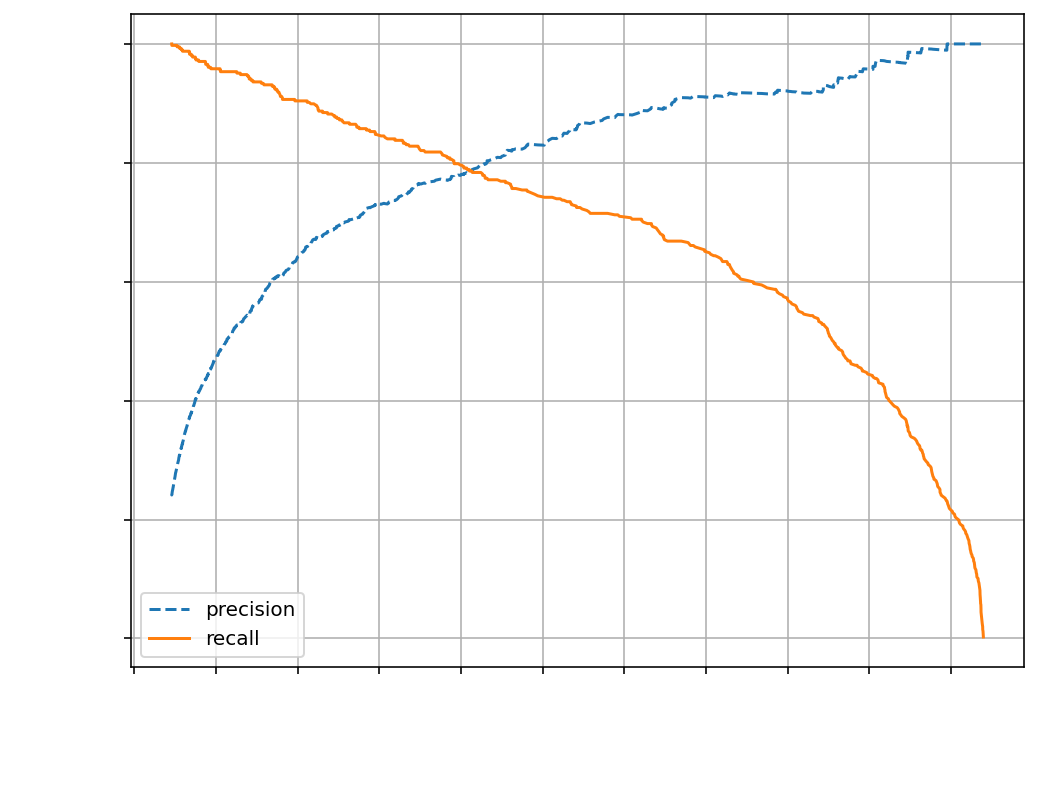

In [46]:
# y_test : 실제 값
# lr_clf.predict_proba(X_test)[:, 1] : 레이블 값이 1일때(두번째)의 예측 확률 값
precision_recall_curve_plot(Test_Y, xgb_wrapper.predict_proba(Test_X)[:, 1]  )





In [47]:
## 학습데이터와 테스트 데이터 레이블 분포 확인
print('학습 데이터 레이블 값 비율')
print(Train_Y.value_counts()/Train_Y.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(Train_Y.value_counts()/Train_Y.shape[0] * 100)

학습 데이터 레이블 값 비율
0.0    83.936801
1.0    16.063199
Name: Attrition_Flag, dtype: float64
테스트 데이터 레이블 값 비율
0.0    83.936801
1.0    16.063199
Name: Attrition_Flag, dtype: float64


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(Test_Y, pred=None, pred_proba=None):
    confusion = confusion_matrix(Test_Y, pred)
    accuracy = accuracy_score(Test_Y , pred)
    precision = precision_score(Test_Y, pred)
    recall = recall_score(Test_Y, pred)
    f1 = f1_score(Test_Y,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(Test_Y, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [49]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression() 
lr_clf.fit(Train_X, Train_Y)

lr_pred = lr_clf.predict(Test_X)
lr_pred_proba  = lr_clf.predict_proba(Test_X)[:,1]

get_clf_eval(Test_Y,lr_pred,lr_pred_proba)

LogisticRegression()

오차 행렬
[[2054   71]
 [ 189  218]]
정확도: 0.8973, 정밀도: 0.7543, 재현율: 0.5356,    F1: 0.6264, AUC:0.8970


In [50]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None) :
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba) ## 평가진행 함수 호출

In [51]:
 
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf, Train_X, Test_X, Train_Y, Test_Y)

오차 행렬
[[2063   62]
 [  98  309]]
정확도: 0.9368, 정밀도: 0.8329, 재현율: 0.7592,    F1: 0.7943, AUC:0.9670


In [52]:
pred_proba = lr_clf.predict_proba(Test_X)
pred_proba[:10]

array([[0.28451135, 0.71548865],
       [0.97170065, 0.02829935],
       [0.98704889, 0.01295111],
       [0.49216581, 0.50783419],
       [0.1142105 , 0.8857895 ],
       [0.53617325, 0.46382675],
       [0.85524449, 0.14475551],
       [0.99050827, 0.00949173],
       [0.9262028 , 0.0737972 ],
       [0.93465111, 0.06534889]])

In [53]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=1.0)

In [54]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred) : 
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)     # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)         # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}'.format(accuracy, precision, recall))    

In [55]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임계값 = 0.5로 설정.  
c_threshold = 0.5

# predict_proba() 반환값이 [0확률, 1확률]로 반환 - positive 클래스 컬럼만 추출해서 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(Test_Y,custom_predict )

오차행렬
[[2054   71]
 [ 189  218]]
정확도: 0.897, 정밀도: 0.754, 재현율: 0.536


In [56]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.05,0.11,0.2,0.3,0.31,0.32,0.35,0.38,0.39, 0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:',custom_threshold)
        get_clf_eval(Test_Y , custom_predict)

In [57]:
get_eval_by_threshold(Test_Y,pred_proba[:,1].reshape(-1,1),thresholds)


임곗값: 0.05
오차행렬
[[1230  895]
 [  30  377]]
정확도: 0.635, 정밀도: 0.296, 재현율: 0.926

임곗값: 0.11
오차행렬
[[1596  529]
 [  49  358]]
정확도: 0.772, 정밀도: 0.404, 재현율: 0.880

임곗값: 0.2
오차행렬
[[1834  291]
 [  93  314]]
정확도: 0.848, 정밀도: 0.519, 재현율: 0.771

임곗값: 0.3
오차행렬
[[1961  164]
 [ 123  284]]
정확도: 0.887, 정밀도: 0.634, 재현율: 0.698

임곗값: 0.31
오차행렬
[[1967  158]
 [ 124  283]]
정확도: 0.889, 정밀도: 0.642, 재현율: 0.695

임곗값: 0.32
오차행렬
[[1973  152]
 [ 129  278]]
정확도: 0.889, 정밀도: 0.647, 재현율: 0.683

임곗값: 0.35
오차행렬
[[1989  136]
 [ 136  271]]
정확도: 0.893, 정밀도: 0.666, 재현율: 0.666

임곗값: 0.38
오차행렬
[[1999  126]
 [ 147  260]]
정확도: 0.892, 정밀도: 0.674, 재현율: 0.639

임곗값: 0.39
오차행렬
[[2006  119]
 [ 151  256]]
정확도: 0.893, 정밀도: 0.683, 재현율: 0.629

임곗값: 0.4
오차행렬
[[2010  115]
 [ 153  254]]
정확도: 0.894, 정밀도: 0.688, 재현율: 0.624

임곗값: 0.45
오차행렬
[[2034   91]
 [ 167  240]]
정확도: 0.898, 정밀도: 0.725, 재현율: 0.590

임곗값: 0.5
오차행렬
[[2054   71]
 [ 189  218]]
정확도: 0.897, 정밀도: 0.754, 재현율: 0.536

임곗값: 0.55
오차행렬
[[2072   53]
 [ 204  203]]
정확도: 0.898, 정밀도: 0.793, 재

In [58]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(Test_X)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(Test_Y, pred_proba_class1)

In [59]:
print('임계값 shape: ', thresholds.shape)
print('정밀도 shape: ', precisions.shape)
print('재현율 shape: ', recalls.shape)

임계값 shape:  (2352,)
정밀도 shape:  (2353,)
재현율 shape:  (2353,)


In [60]:
idx = np.arange(0, thresholds.shape[0],15)
print('sample index:', idx)
print('임계값 sample: ', np.round(thresholds[idx], 3))
print('정밀도 sample: ', np.round(precisions[idx], 3))
print('재현율 sample: ', np.round(recalls[idx], 3))

sample index: [   0   15   30   45   60   75   90  105  120  135  150  165  180  195
  210  225  240  255  270  285  300  315  330  345  360  375  390  405
  420  435  450  465  480  495  510  525  540  555  570  585  600  615
  630  645  660  675  690  705  720  735  750  765  780  795  810  825
  840  855  870  885  900  915  930  945  960  975  990 1005 1020 1035
 1050 1065 1080 1095 1110 1125 1140 1155 1170 1185 1200 1215 1230 1245
 1260 1275 1290 1305 1320 1335 1350 1365 1380 1395 1410 1425 1440 1455
 1470 1485 1500 1515 1530 1545 1560 1575 1590 1605 1620 1635 1650 1665
 1680 1695 1710 1725 1740 1755 1770 1785 1800 1815 1830 1845 1860 1875
 1890 1905 1920 1935 1950 1965 1980 1995 2010 2025 2040 2055 2070 2085
 2100 2115 2130 2145 2160 2175 2190 2205 2220 2235 2250 2265 2280 2295
 2310 2325 2340]
임계값 sample:  [0.003 0.004 0.004 0.004 0.004 0.004 0.005 0.005 0.005 0.006 0.006 0.006
 0.006 0.007 0.007 0.007 0.008 0.008 0.008 0.008 0.009 0.009 0.01  0.01
 0.01  0.01  0.011 0.011 0.011

In [61]:
col_dict={'임곗값': np.round(thresholds[idx], 2),
          '정밀도': np.round(precisions[idx], 3),
          '재현율': np.round(recalls[idx], 3)}
df = pd.DataFrame(col_dict)
df

,임곗값,정밀도,재현율
0,0.00,0.173,1.000
1,0.00,0.174,0.998
2,0.00,0.175,0.998
3,0.00,0.176,0.998
4,0.00,0.177,0.998
...,...,...,...
152,0.87,0.958,0.170
153,0.90,0.947,0.133
154,0.93,0.976,0.101
155,0.95,0.963,0.064


In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# y_test : 실제 값  pred_proba_c1: 예측 확률 값
def precision_recall_curve_plot(Test_Y , pred_proba_c1): 
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(Test_Y, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # (143,)에서 143 추출
    # thresholds : 143이고, precisions과 recalls는 144개로 x, y축 값의 개수가 맞지 않으므로
    # precisions, recalls로 그래프 그리면 오류 
    # y 값을 [0:threshold_boundary] ([0:143])로 143개 추출해서 x축 개수와 맞춤
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    # xlim() : X축 범위를 지정하거나 반환
    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    font = {
        'color': 'white',
        'size' : 16
         }




    plt.tick_params(axis='x',labelcolor='white')
    plt.tick_params(axis='y',labelcolor='white')

    plt.xlabel('Threshhold value', labelpad=20, fontdict=font)
    plt.ylabel('Precision and Recall value', labelpad=20, fontdict=font)
    plt.legend(); plt.grid()
    plt.show()


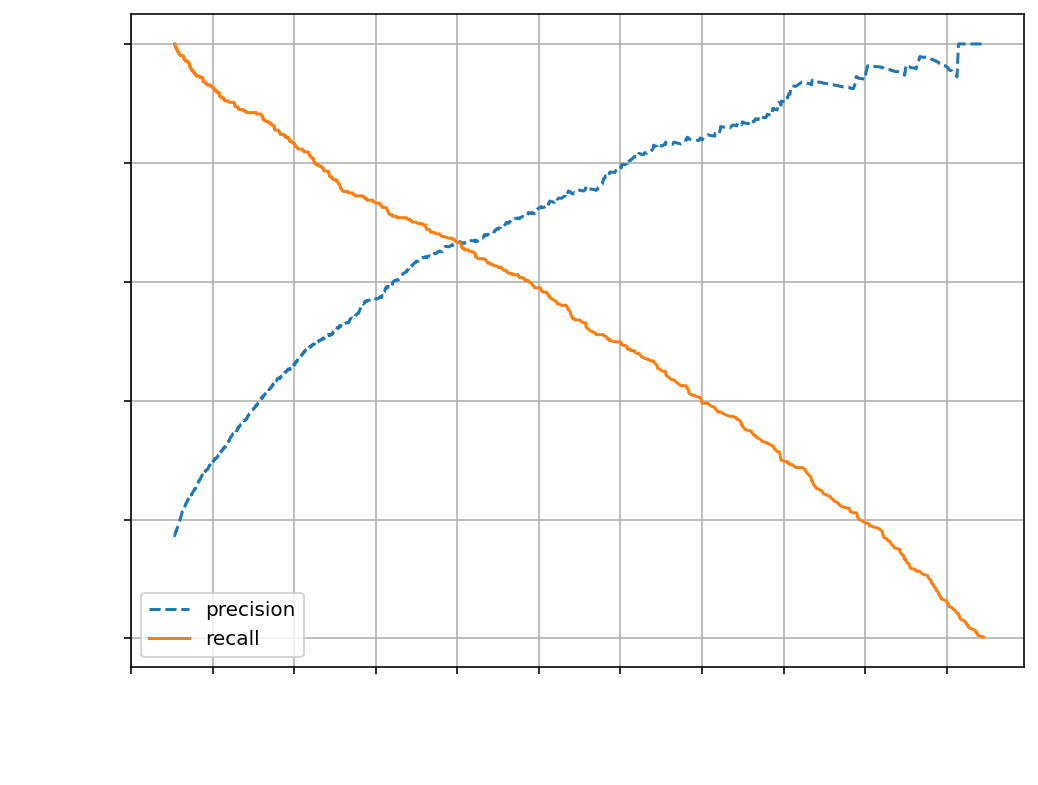

In [65]:
# y_test : 실제 값
# lr_clf.predict_proba(X_test)[:, 1] : 레이블 값이 1일때(두번째)의 예측 확률 값
precision_recall_curve_plot(Test_Y, lr_clf.predict_proba(Test_X)[:, 1] )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=156)
dt_clf.fit(Train_X,Train_Y)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", impurity=True, filled=True)


In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)